In [1]:
import pandas as pd

In [84]:
import numpy as np

In [46]:
import matplotlib.pyplot as plt

In [80]:
from numpy.fft import fft, ifft

In [34]:

airq = pd.read_csv("measurements.csv")

In [35]:
airq.head(10)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,0.467942,ppm,32.874983,-96.804699
1,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,0.520272,ppm,32.865702,-96.820827
2,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,0.706175,ppm,32.874053,-96.813518
3,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,0.970707,ppm,32.776010,-96.751040
4,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,0.424838,ppm,32.734751,-96.811575
5,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,2.807451,ppm,32.707555,-96.815905
6,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,0.466063,ppm,32.732102,-96.811475
7,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,1.384808,ppm,32.867042,-96.804674
8,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,1.196360,ppm,32.867384,-96.806516
9,61498,NaN,Dallas,US,2016-02-04T00:00:00+00:00,2016-02-04T00:00:00+00:00,ch4,1.044145,ppm,32.823235,-96.796774


In [98]:
airq.shape

(339, 11)

In [99]:
airq.info

<bound method DataFrame.info of      locationId  location    city country                  datetime  \
0         61498       NaN  Dallas      US 2016-02-05 00:00:00+00:00   
1         61498       NaN  Dallas      US 2016-02-05 00:00:00+00:00   
2         61498       NaN  Dallas      US 2016-02-05 00:00:00+00:00   
3         61498       NaN  Dallas      US 2016-02-05 00:00:00+00:00   
4         61498       NaN  Dallas      US 2016-02-05 00:00:00+00:00   
..          ...       ...     ...     ...                       ...   
334       61498       NaN  Dallas      US 2016-01-02 00:00:00+00:00   
335       61498       NaN  Dallas      US 2016-01-02 00:00:00+00:00   
336       61498       NaN  Dallas      US 2016-01-02 00:00:00+00:00   
337       61498       NaN  Dallas      US 2016-01-02 00:00:00+00:00   
338       61498       NaN  Dallas      US 2016-01-02 00:00:00+00:00   

                         local parameter     value unit   latitude  longitude  
0    2016-02-05T00:00:00+00:00     

In [44]:
airq = airq.rename(columns={"utc": "datetime"})

In [45]:
airq.head()

,locationId,location,city,country,datetime,local,parameter,value,unit,latitude,longitude
0,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,0.467942,ppm,32.874983,-96.804699
1,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,0.520272,ppm,32.865702,-96.820827
2,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,0.706175,ppm,32.874053,-96.813518
3,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,0.970707,ppm,32.776010,-96.751040
4,61498,NaN,Dallas,US,2016-02-05T00:00:00+00:00,2016-02-05T00:00:00+00:00,ch4,0.424838,ppm,32.734751,-96.811575


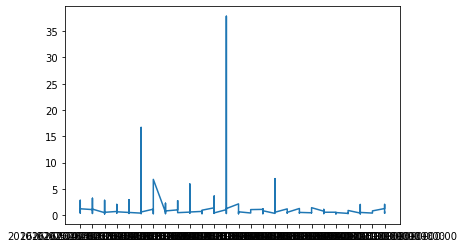

In [48]:
plt.plot(airq['datetime'], airq['value'])

In [67]:
airq["datetime"] = pd.to_datetime(airq["datetime"])

In [68]:
airq['datetime'].min(),airq['datetime'].max()

(Timestamp('2016-01-02 00:00:00+0000', tz='UTC'),
 Timestamp('2016-02-05 00:00:00+0000', tz='UTC'))

In [ ]:
#What is the average concentration for each day of the week for each of the measurement locations?

In [73]:
airq.groupby([airq["datetime"].dt.weekday, 'city'])["value"].mean()

datetime  city  
0         Dallas    0.817607
1         Dallas    1.403346
2         Dallas    1.088512
3         Dallas    1.164696
4         Dallas    0.916162
5         Dallas    1.101014
6         Dallas    1.324754
Name: value, dtype: float64

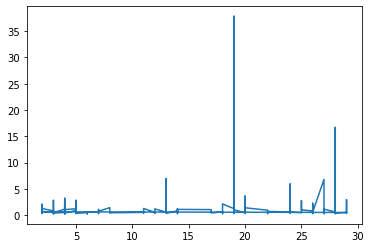

In [77]:
plt.plot(airq["datetime"].dt.day, t.airq['value'])

In [76]:
airq.info

<bound method DataFrame.info of      locationId  location    city country                  datetime  \
0         61498       NaN  Dallas      US 2016-02-05 00:00:00+00:00   
1         61498       NaN  Dallas      US 2016-02-05 00:00:00+00:00   
2         61498       NaN  Dallas      US 2016-02-05 00:00:00+00:00   
3         61498       NaN  Dallas      US 2016-02-05 00:00:00+00:00   
4         61498       NaN  Dallas      US 2016-02-05 00:00:00+00:00   
..          ...       ...     ...     ...                       ...   
334       61498       NaN  Dallas      US 2016-01-02 00:00:00+00:00   
335       61498       NaN  Dallas      US 2016-01-02 00:00:00+00:00   
336       61498       NaN  Dallas      US 2016-01-02 00:00:00+00:00   
337       61498       NaN  Dallas      US 2016-01-02 00:00:00+00:00   
338       61498       NaN  Dallas      US 2016-01-02 00:00:00+00:00   

                         local parameter     value unit   latitude  longitude  
0    2016-02-05T00:00:00+00:00     

<AxesSubplot:xlabel='datetime'>

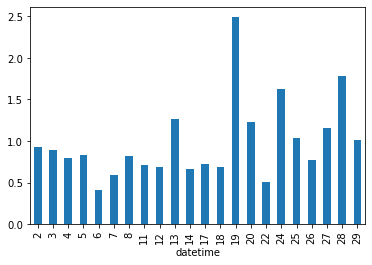

In [95]:
airq.groupby(airq["datetime"].dt.day)["value"].mean().plot(
       kind='bar')

In [78]:
dayV=airq["datetime"].dt.day

In [81]:
dayF=fft(dayV)

In [82]:
N=len(dayF)

In [85]:
n=np.arange(N)

In [87]:
# get sampling rate
sr= 1/100
T= N/sr
freq=n/T

Text(0, 0.5, 'FFT amplitude')

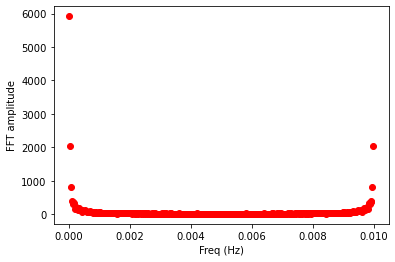

In [92]:
plt.plot(freq,np.abs(dayF),'ro')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT amplitude')